<a href="https://colab.research.google.com/github/DietzscheNostoevsky/Learning_Pytorch/blob/main/03_Pytorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Comuter Vision

- Anything that can described in a visual sense can be a potential computer vision problem.

# Workflow 

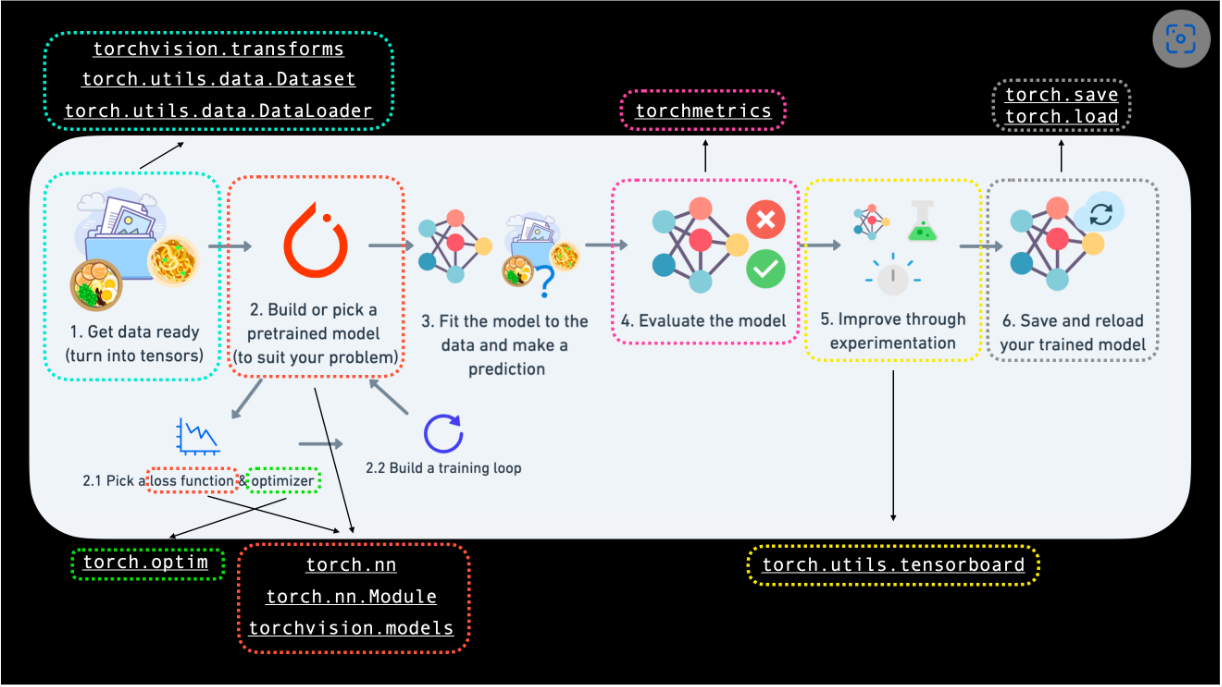

# Importing Libraries

In [1]:
import torch 
from torch import nn 

# Torchvision
import torchvision 
from torchvision import datasets 
from torchvision.transforms import ToTensor # Convert a PIL Image or ndarray to tensor and scale the values accordingly.

import matplotlib.pyplot as plt

# Checking versions

print(F"PyTorch versrion : {torch.__version__}")
print(F"TorchVision version : {torchvision.__version__}")

PyTorch versrion : 2.0.0+cu118
TorchVision version : 0.15.1+cu118


# Dataset 

**Fashion MNIST**

- **Multiclass Classification** 

- 10 image classes ( different types of clothing ) 


In [2]:
# Setting up training and Test data 

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None, 
)

# Testing Data 
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
)


In [3]:
# training sample 
image, label = train_data[0]
print(F"image: {image} \n \n label : {label}")


image: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 

# EDA

## Data Size

In [4]:
# Input and Output shapes of data 
image.shape

torch.Size([1, 28, 28])

Image is 28X28 pixels

- 
The shape of the image tensor is [1, 28, 28] or more specifically:

    `[color_channels=1, height=28, width=28]`

- Color channel = GreyScale (1) 

- Data in `NCHW` format, but, `NHWC` better in PyTorch 

In [5]:
# Data Shape 

len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

`60000` Training Samples and `10000` Test Samples 

Number of `Classes`

In [6]:
class_names  = train_data.classes
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Problem is ***Multi-Class Classification***

## DataViz

Image shape: torch.Size([1, 28, 28])


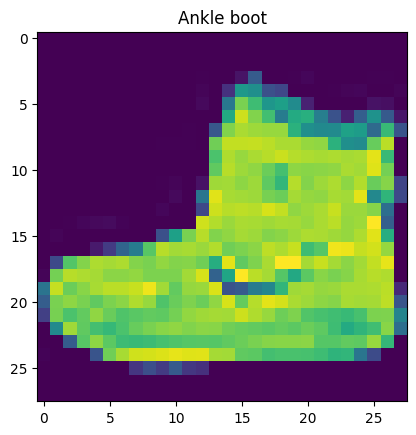

In [7]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(class_names[label]);

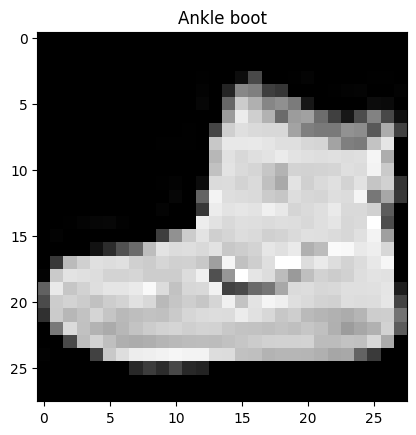

In [8]:
# GreyScale 

plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

Multiplot 

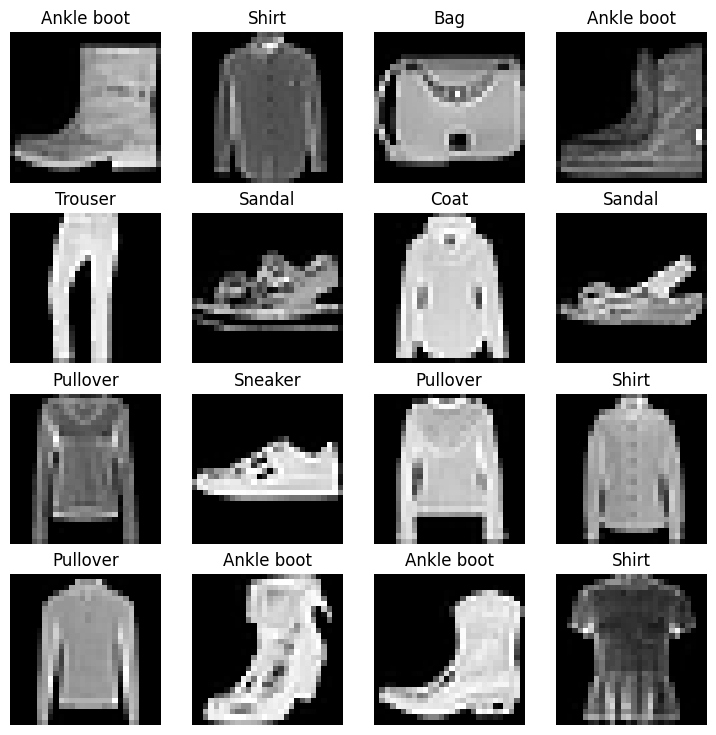

In [9]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

# DataLoader

prepare the Dataset with a `torch.utils.data.DataLoader` or `DataLoader` for short.

Converts datasets into `mini-batches`

`Dataset` stores the `samples` and their corresponding `labels`, and `DataLoader` wraps an iterable around the `Dataset` to enable easy access to the samples.




In [10]:
# Crearting DataLoader 

from torch.utils.data import DataLoader

# Batch-size Hyperparameter 

BATCH_SIZE = 32

# turining data into iterables ( Batches )

train_dataloader = DataLoader(
    dataset=train_data, # dataset to be turned into an iterable 
    batch_size=BATCH_SIZE, # How many samples per batch 
    shuffle=True, # shuffle data after every epoch ?
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f7209ceca00>, <torch.utils.data.dataloader.DataLoader object at 0x7f7209ceca30>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [11]:
# What is inside training Dataloader 

train_features_batch, train_labels_batch = next(iter(train_dataloader))
# is used to extract a batch of data from a PyTorch dataloader.



Checking a single sample to verify the data

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


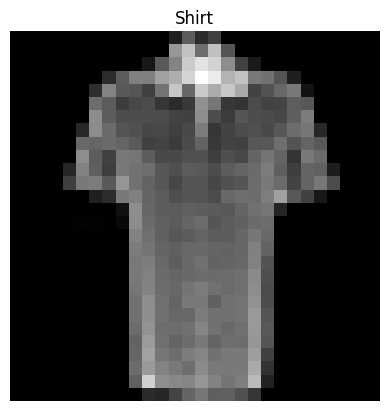

In [12]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item() 
                    # In PyTorch, the item() method is used to retrieve 
                    # the value of a tensor as a standard Python scalar. 
                    # It is typically used when you have a tensor with a single element, 
                    # such as a tensor representing a loss value or a single prediction.

img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# Baseline Model 

**Model 0**

- To set a baseline performance and improve upon it subsequently 

## Setting up Model

In [13]:
# Flatening the input

# nn.Flatten() compresses the dimensions of a tensor into a single vector.

flatten_model = nn.Flatten()    # all nn modules function as a model, 
                                # ie can do a forward pass 
# Getting a single sample 

x = train_features_batch[0]

# Flattening the sample 
output = flatten_model(x) # forward pass 

# Printing output 

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


The `nn.Flatten()` layer took our shape from `[color_channels, height, width]` to `[color_channels, height*width]`.

Now turned the pixel data from height and width dimensions into one long feature vector.

`nn.Linear` likes its inputs in form of feature vectors 

In [14]:
# Model 0
# Simple Linear Model 


from torch import nn
from torch.nn.modules.linear import Linear

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )

    def forward(self, x):
        return self.layer_stack(x)



In [15]:
# Instantiate the Model 

model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names),
).to("cpu")

print(model_0)

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)


## Loss, Optimizer and Evaluation Metrics

In [16]:
# Importing from previous modules 

import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [17]:
# Backup accuracy 
from helper_functions import accuracy_fn

In [18]:
# Accuracy 

try:
    from torchmetrics import Accuracy 
except:
    !pip install torchmetrics

accuracy = Accuracy(task="multiclass",
                    num_classes=len(class_names),
                    )

print(accuracy)

MulticlassAccuracy()


In [19]:
# Loss Function
loss_fn = nn.CrossEntropyLoss() # This criterion computes the cross entropy loss
                                # between input logits and target.

print(loss_fn)

CrossEntropyLoss()


In [20]:
# Optimizer 
optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.1
)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


## Timing the experiments 

In [21]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

## Training 

Extra loop inside training loop required to go through the batches 
- `loss` and `eval metrics` would be calculated on per batch, instead of whole dataset . 

--------------------------
 1. Loop through epochs.
 2. Loop through training batches, perform training steps, calculate the train loss per batch.
 3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
 4. Print out what's happening.

 -------------------------

In [22]:
# for progress bar
from tqdm.auto import trange, tqdm 

# Training Loop 
# Start seed 

torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Number of Epochs 
epochs = 3

# Training and testing loop

for epoch in tqdm(range(epochs)):
    print(F"Epoch: {epoch}\n------")

    # Training 
    train_loss = 0

    # loop to loop through the batches 
    for batch, (X,y) in enumerate(train_dataloader):    # enumerate() is a built-in function in Python 
                                                        # that allows you to iterate over a sequence 
                                                        # while keeping track of the index of each element. 
                                                        # It takes an iterable (such as a list, tuple, or string) 
                                                        # as input and returns an iterator that generates 
                                                        # pairs of index and corresponding elements.
        model_0.train()

        # 1. Forward Pass 
        y_pred = model_0(X) # output logits  

        # 2. Calculate the loss 
        loss = loss_fn(y_pred, y) # loss for this specific batch
                                  # input logits 
        train_loss += loss # accumulate loss per epoch 

        # 3. Optimizer Zero grad
        optimizer.zero_grad()

        # 4. Loss baclward 
        loss.backward() # Backprop adone per batch 

        # 5.Optimizer step
        optimizer.step()

        # print out how many batches sample have seen
        if batch%400 == 0:
            print(F"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} sampples")

    # Average loss per batch, per epoch 
    # Divide total train loss by length of train dataloader 

    train_loss /= len(train_dataloader)

    # Testing 

    test_loss, test_acc = 0,0
    model_0.eval()

    with torch.inference_mode():
        for X,y in test_dataloader:
            
            # 1. Forward Pass
            test_pred = model_0(X)

            # 2. Calculate loss ( accumutively )
            test_loss += loss_fn(test_pred, y)

            # 3. Calculate Accuracy 
                                    # ( preds need to be same as y_true 
                                    # if using accuracy_fn from helper file
                                    # if using torchmetrics accuracy, 
                                    # from docs : 
                                    # preds (Tensor): An int tensor of shape (N, ...) or 
                                    # float tensor of shape (N, C, ..). 
                                    # If preds is a floating point we apply torch.argmax 
                                    # along the C dimension to automatically convert probabilities/logits into an int tensor. )
                                    # target (Tensor): An int tensor of shape (N, ...)

            test_acc += accuracy(preds=test_pred, target=y )
            #test_acc += accuracy(preds=test_pred.argmax(dim=1), target=y ) # this should work too 
            #test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1)) # jsut to test output accuracy format in %
                                                                                # Found the bug
                                                                                # if accuracy_fn be used, the accuracy is being multiplided by 
                                                                                # a factor of 100 in origical code implementation
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of the test dataloader ( per batch )
        test_acc /= len(test_dataloader)

    ## print out whats happening 
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
    
# Calculate Training time 

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 sampples
Looked at 12800/60000 sampples
Looked at 25600/60000 sampples
Looked at 38400/60000 sampples
Looked at 51200/60000 sampples

Train loss: 0.59484 | Test loss: 0.51635, Test acc: 81.84%

Epoch: 1
------
Looked at 0/60000 sampples
Looked at 12800/60000 sampples
Looked at 25600/60000 sampples
Looked at 38400/60000 sampples
Looked at 51200/60000 sampples

Train loss: 0.47946 | Test loss: 0.48138, Test acc: 83.18%

Epoch: 2
------
Looked at 0/60000 sampples
Looked at 12800/60000 sampples
Looked at 25600/60000 sampples
Looked at 38400/60000 sampples
Looked at 51200/60000 sampples

Train loss: 0.45703 | Test loss: 0.47773, Test acc: 83.50%

Train time on cpu: 64.157 seconds
